In [1]:
import findspark
findspark.init()
import pyspark

sc = pyspark.SparkContext(master='spark://hd-master:7077',
                          appName='big_data')

[649, 783, 370, 523, 522]

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import matplotlib.pyplot as plt
from pyspark.sql import SQLContext
import seaborn as sns

print('Modules are imported.')

Modules are imported.


In [ ]:
spark = SQLContext(sc)

In [3]:
covid_data = spark.read.option("header", True).csv("hdfs://hd-master:9000/covid-19", inferSchema=True)
covid_data.show(5, truncate=False)

In [4]:
# Perform necessary data transformations
covid_data = covid_data.withColumn("year", F.year("date"))
covid_data = covid_data.withColumn("month", F.month("date"))

# Filter data for the year 2022
covid_data_2022 = covid_data.filter(covid_data.year == 2022)

# Calculate total confirmed cases by country and month for the year 2022
total_confirmed_2022_monthly = covid_data_2022.groupBy("country", "month").agg(F.sum("confirmed").alias("total_confirmed"))

# Order the result by country and month
total_confirmed_2022_monthly = total_confirmed_2022_monthly.orderBy("country", "month")

# Show the result
total_confirmed_2022_monthly.show()

+-----------+-----+---------------+
|    country|month|total_confirmed|
+-----------+-----+---------------+
|afghanistan|    1|        4938320|
|afghanistan|    2|        4759331|
|afghanistan|    3|        5465007|
|afghanistan|    4|        5350389|
|afghanistan|    5|        5562250|
|afghanistan|    6|        5441364|
|afghanistan|    7|        5699567|
|afghanistan|    8|        5876924|
|afghanistan|    9|        5899026|
|afghanistan|   10|        6237917|
|afghanistan|   11|        6140134|
|afghanistan|   12|        6413335|
|    albania|    1|        7217971|
|    albania|    2|        7491180|
|    albania|    3|        8456152|
|    albania|    4|        8233062|
|    albania|    5|        8544921|
|    albania|    6|        8323448|
|    albania|    7|        9157061|
|    albania|    8|        9994918|
+-----------+-----+---------------+
only showing top 20 rows



In [5]:
pandas_df = total_confirmed_2022_monthly.toPandas()

In [6]:
pandas_df.head()

,country,month,total_confirmed
0,afghanistan,1,4938320
1,afghanistan,2,4759331
2,afghanistan,3,5465007
3,afghanistan,4,5350389
4,afghanistan,5,5562250


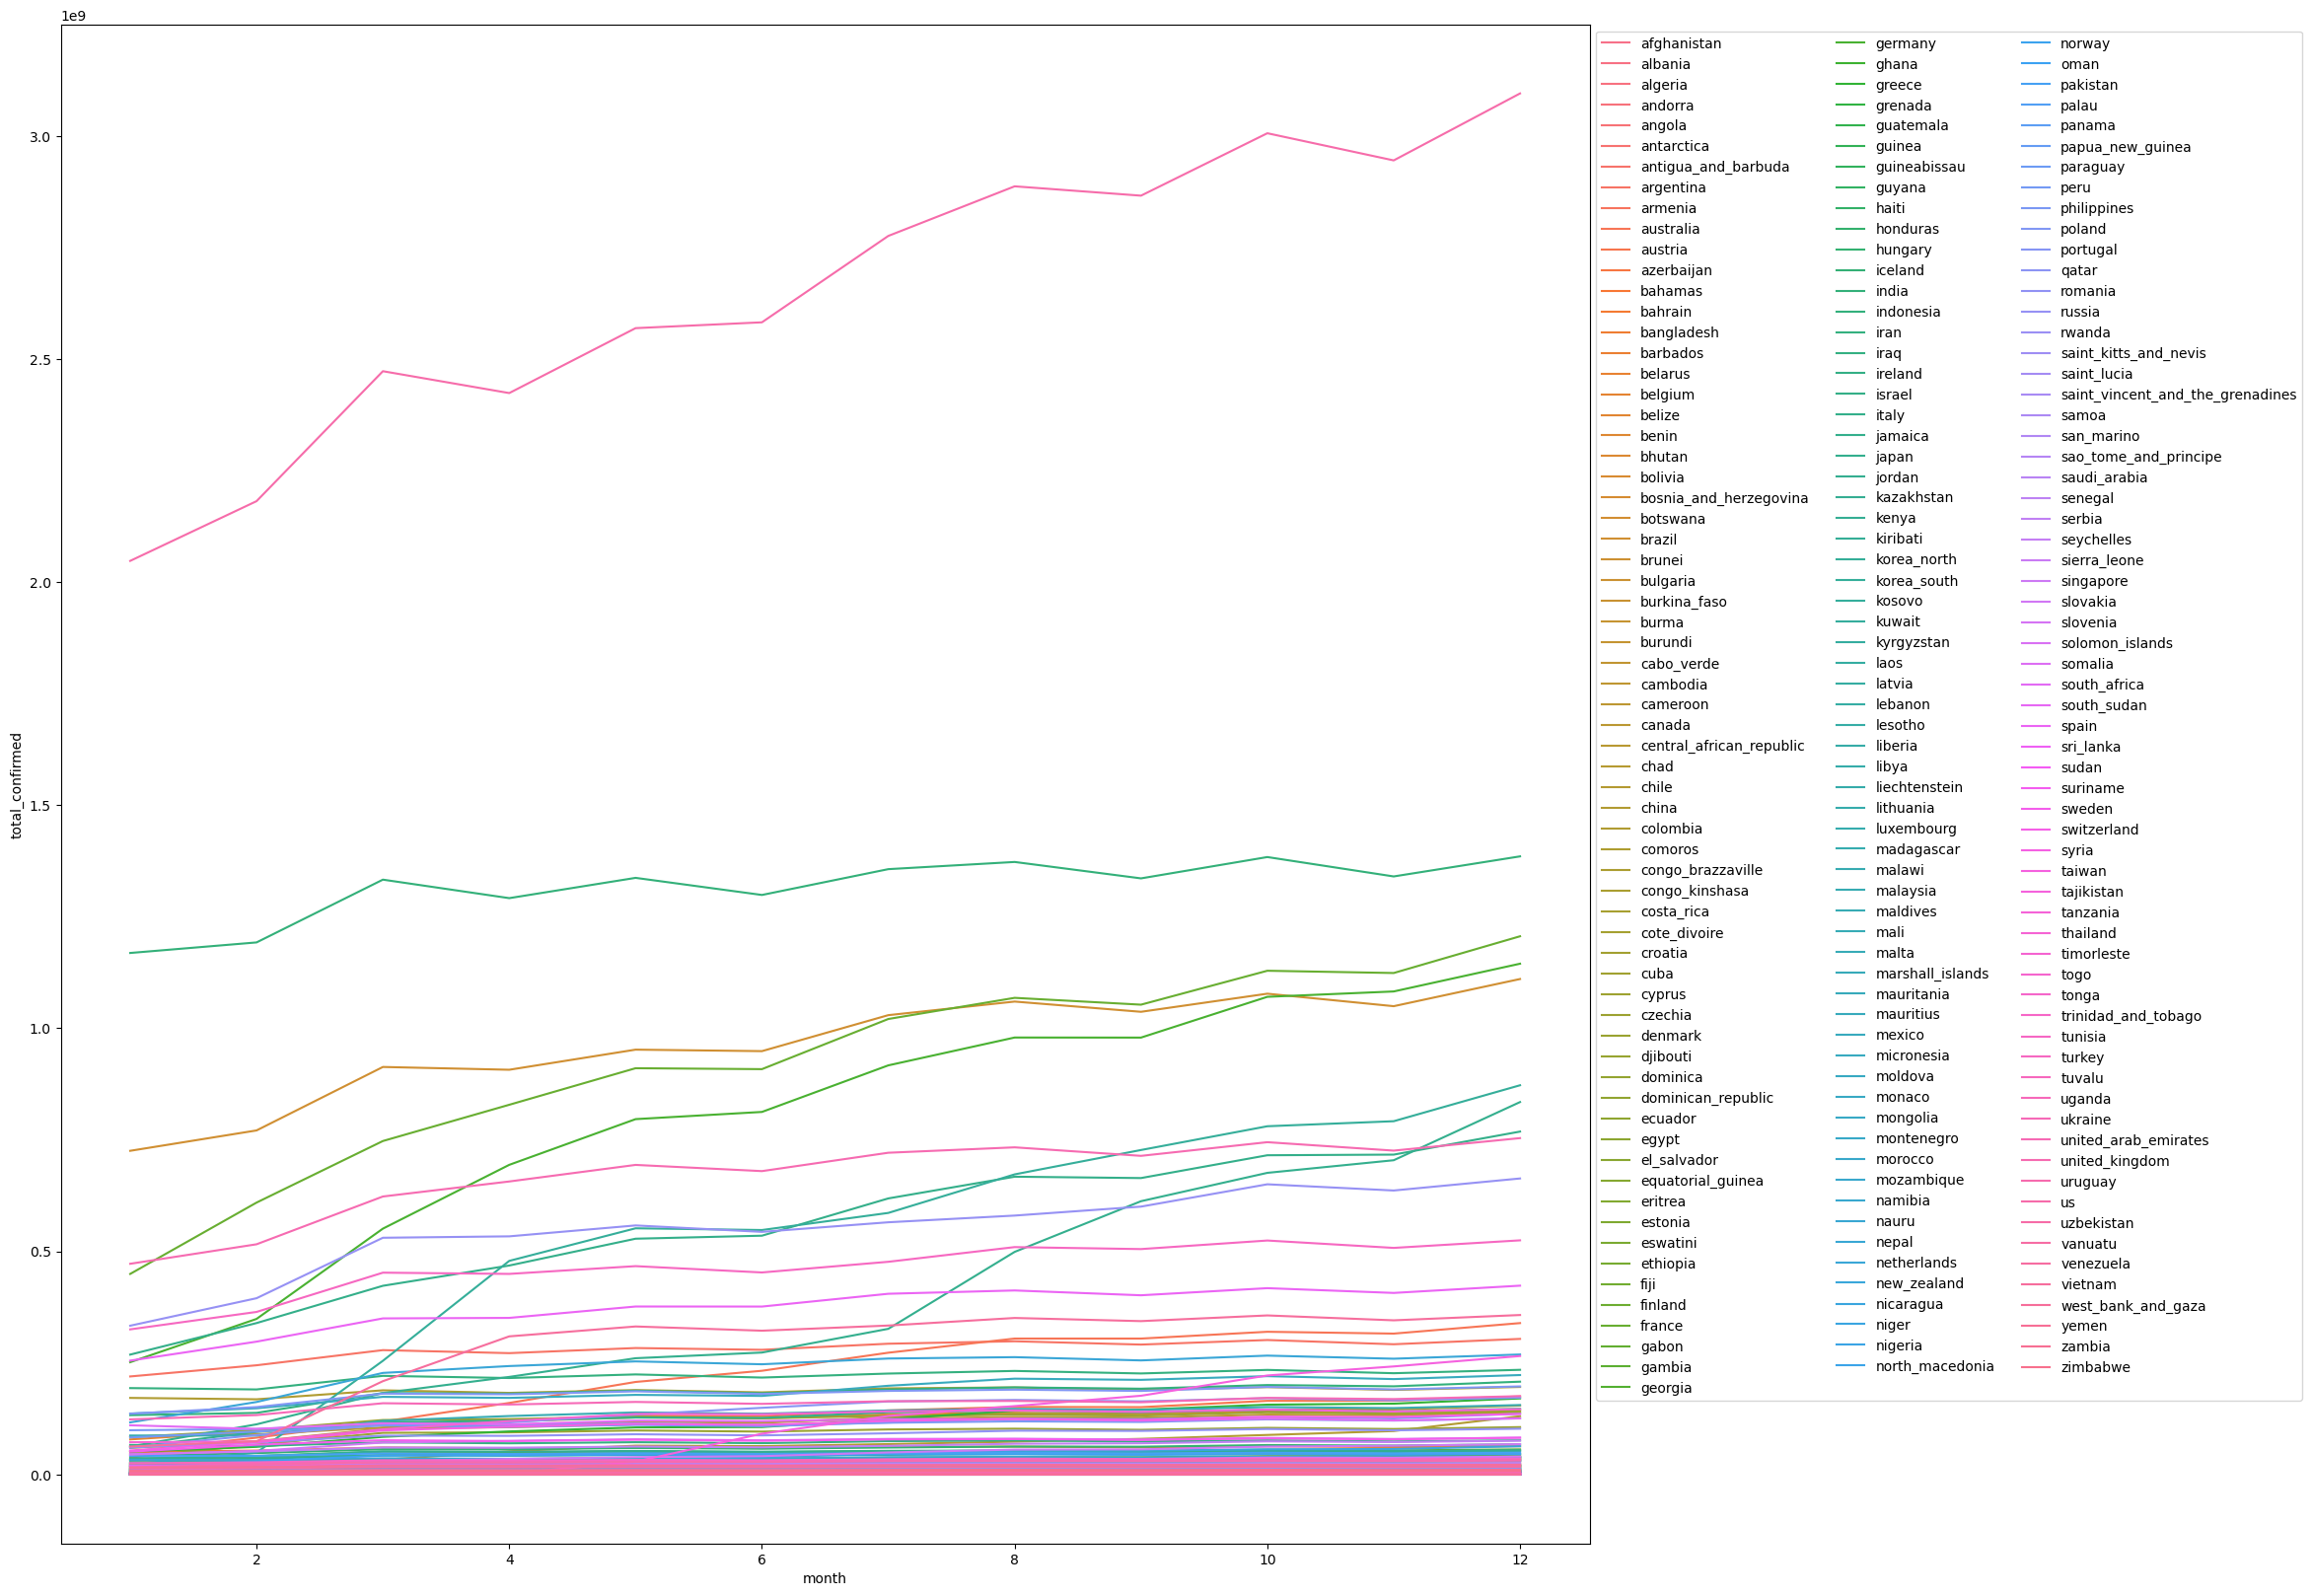

In [7]:
plt.figure(figsize=(20,20))
sns.lineplot(data=pandas_df, x='month', y='total_confirmed', hue='country', markers=True, dashes=False)
plt.legend(ncol=3, bbox_to_anchor=(1,1))
plt.show()

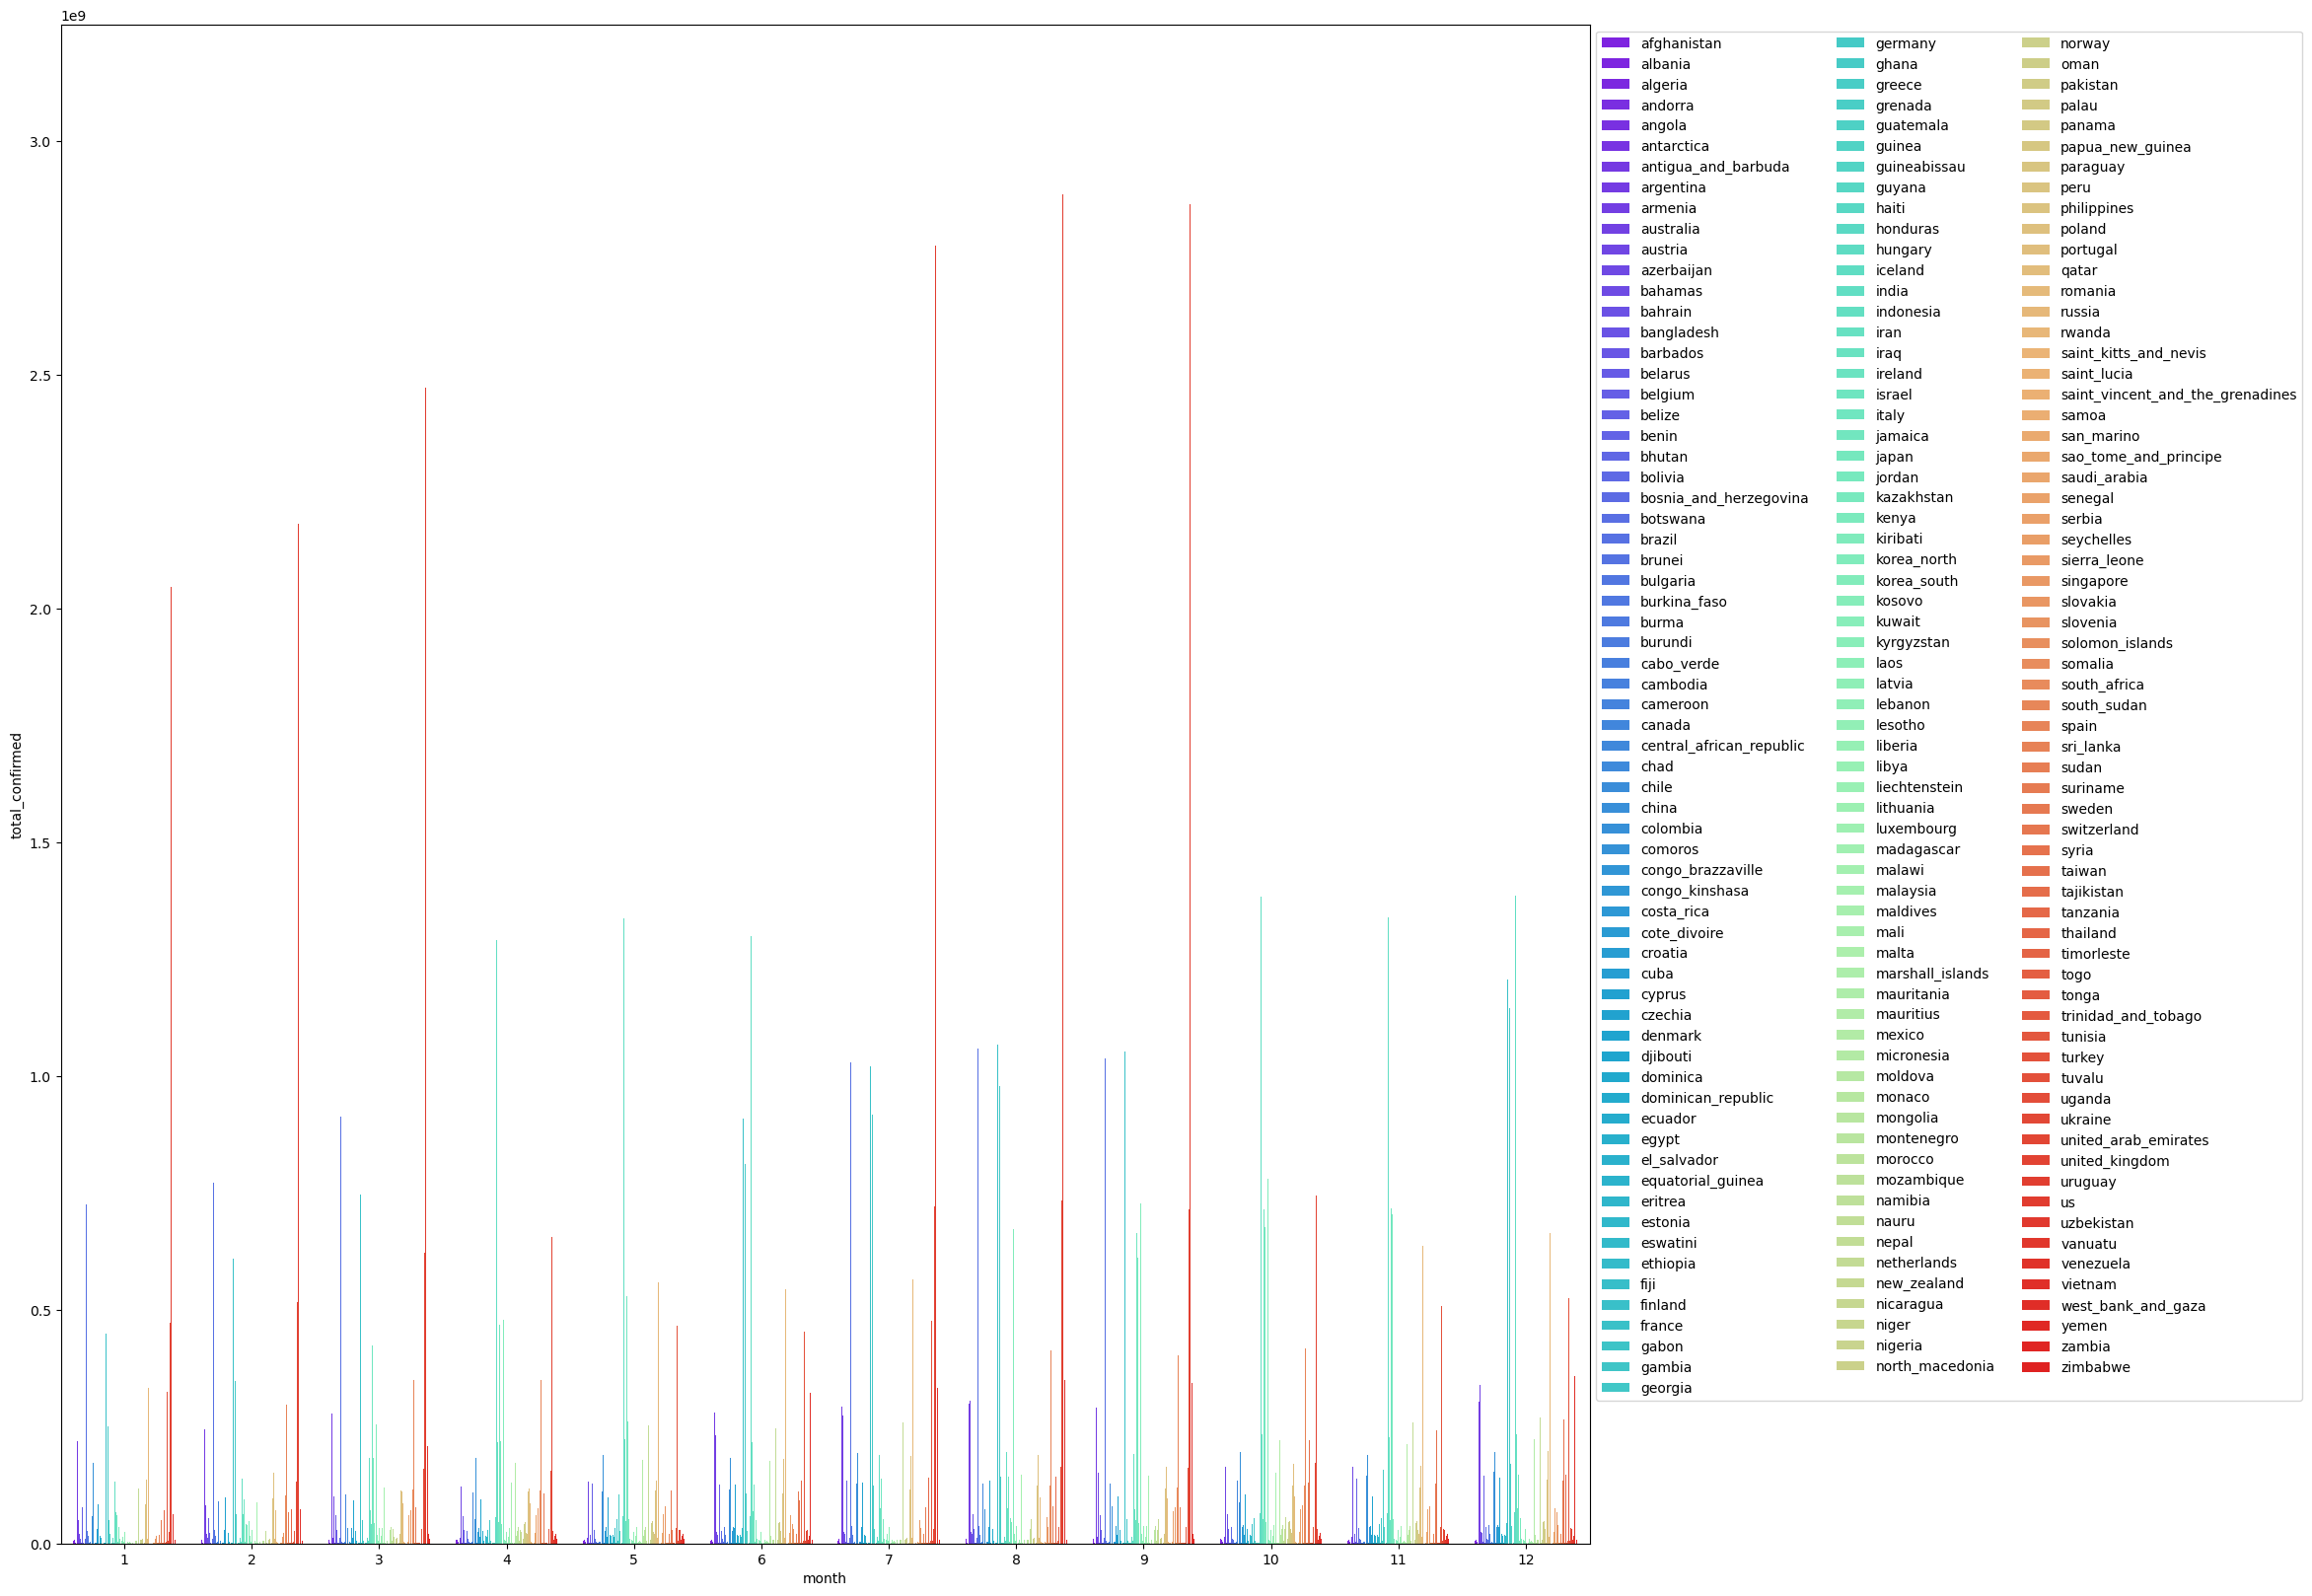

In [8]:
plt.figure(figsize=(20,20))
# Create a bar plot
sns.barplot(data=pandas_df, x='month', y='total_confirmed', hue='country', palette='rainbow')
plt.legend(ncol=3, bbox_to_anchor=(1,1))
# Show the plot
plt.show()

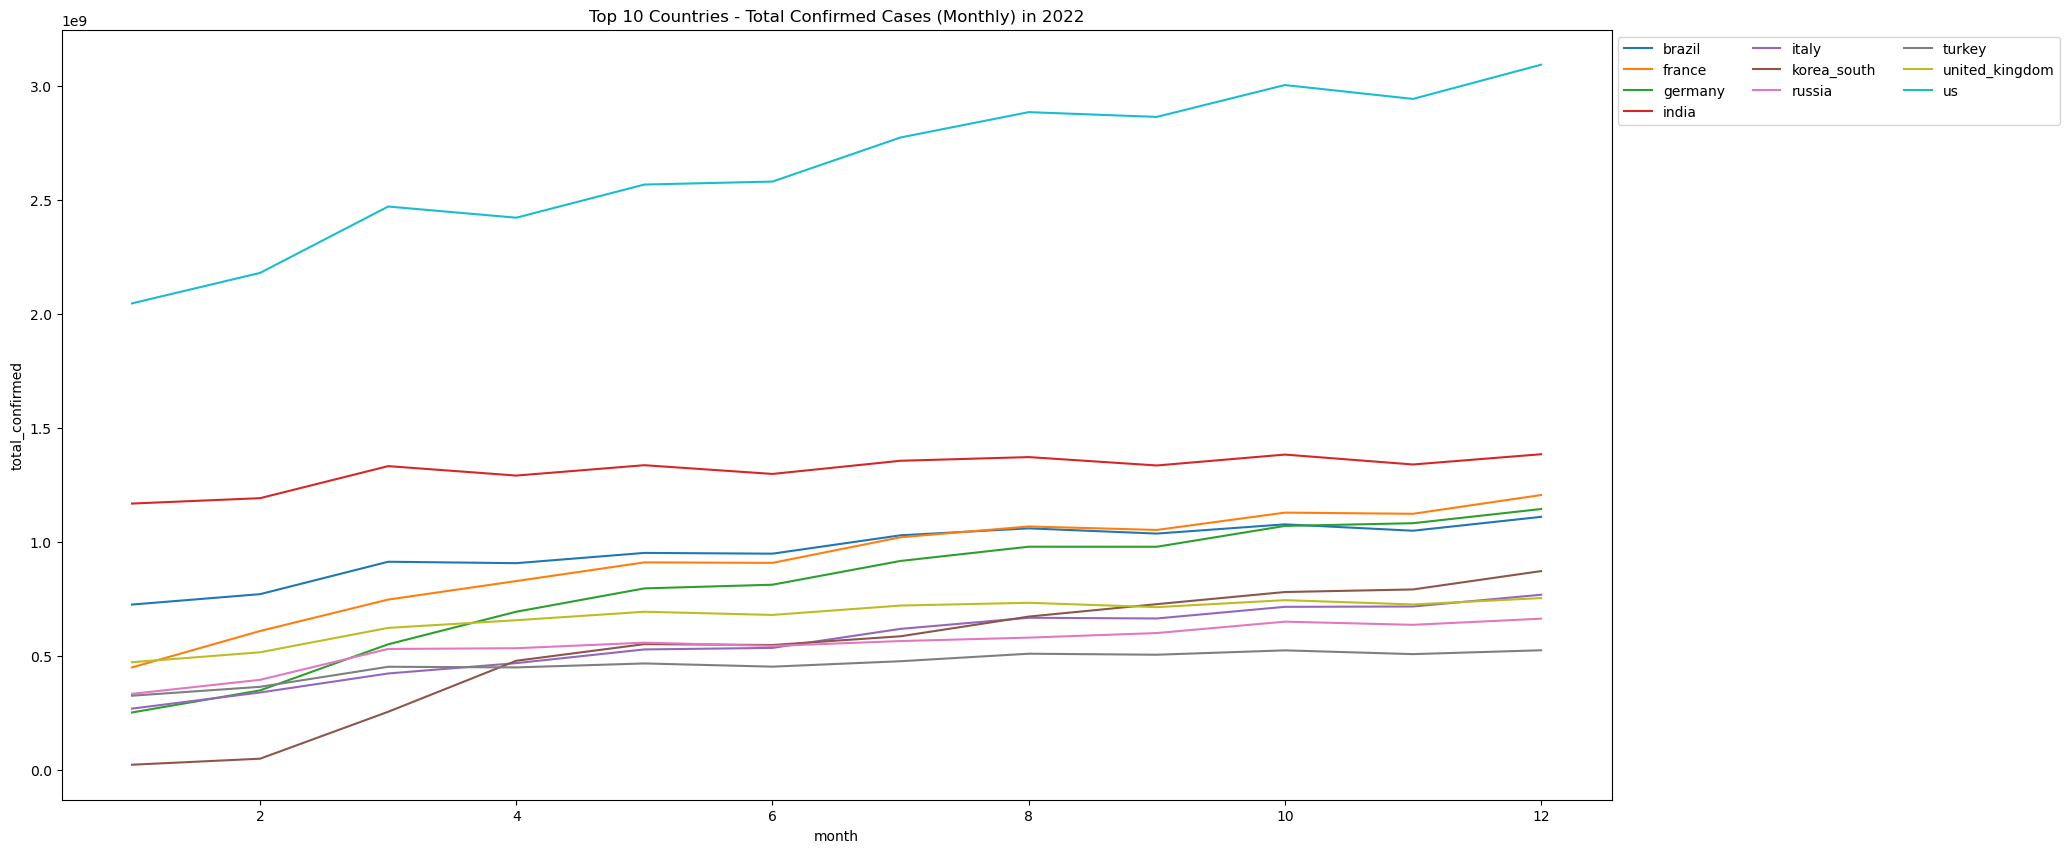

In [9]:
# Calculate total confirmed cases by country and month for the year 2022
total_confirmed_2022_monthly = covid_data_2022.groupBy("country", "month").agg(F.sum("confirmed").alias("total_confirmed"))

# Order the result by country and month
total_confirmed_2022_monthly = total_confirmed_2022_monthly.orderBy("country", "month")

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = total_confirmed_2022_monthly.toPandas()

# Select the top 10 countries
top_10_countries = pandas_df.groupby('country')['total_confirmed'].sum().nlargest(10).index

# Filter the DataFrame for the top 10 countries
top_10_confirmed_2022_monthly = pandas_df[pandas_df['country'].isin(top_10_countries)]

# Plot the line chart for the top 10 countries
plt.figure(figsize=(20, 10))
sns.lineplot(data=top_10_confirmed_2022_monthly, x='month', y='total_confirmed', hue='country', markers=True, dashes=False)
plt.legend(ncol=3, bbox_to_anchor=(1, 1))
plt.title('Top 10 Countries - Total Confirmed Cases (Monthly) in 2022')
plt.show()

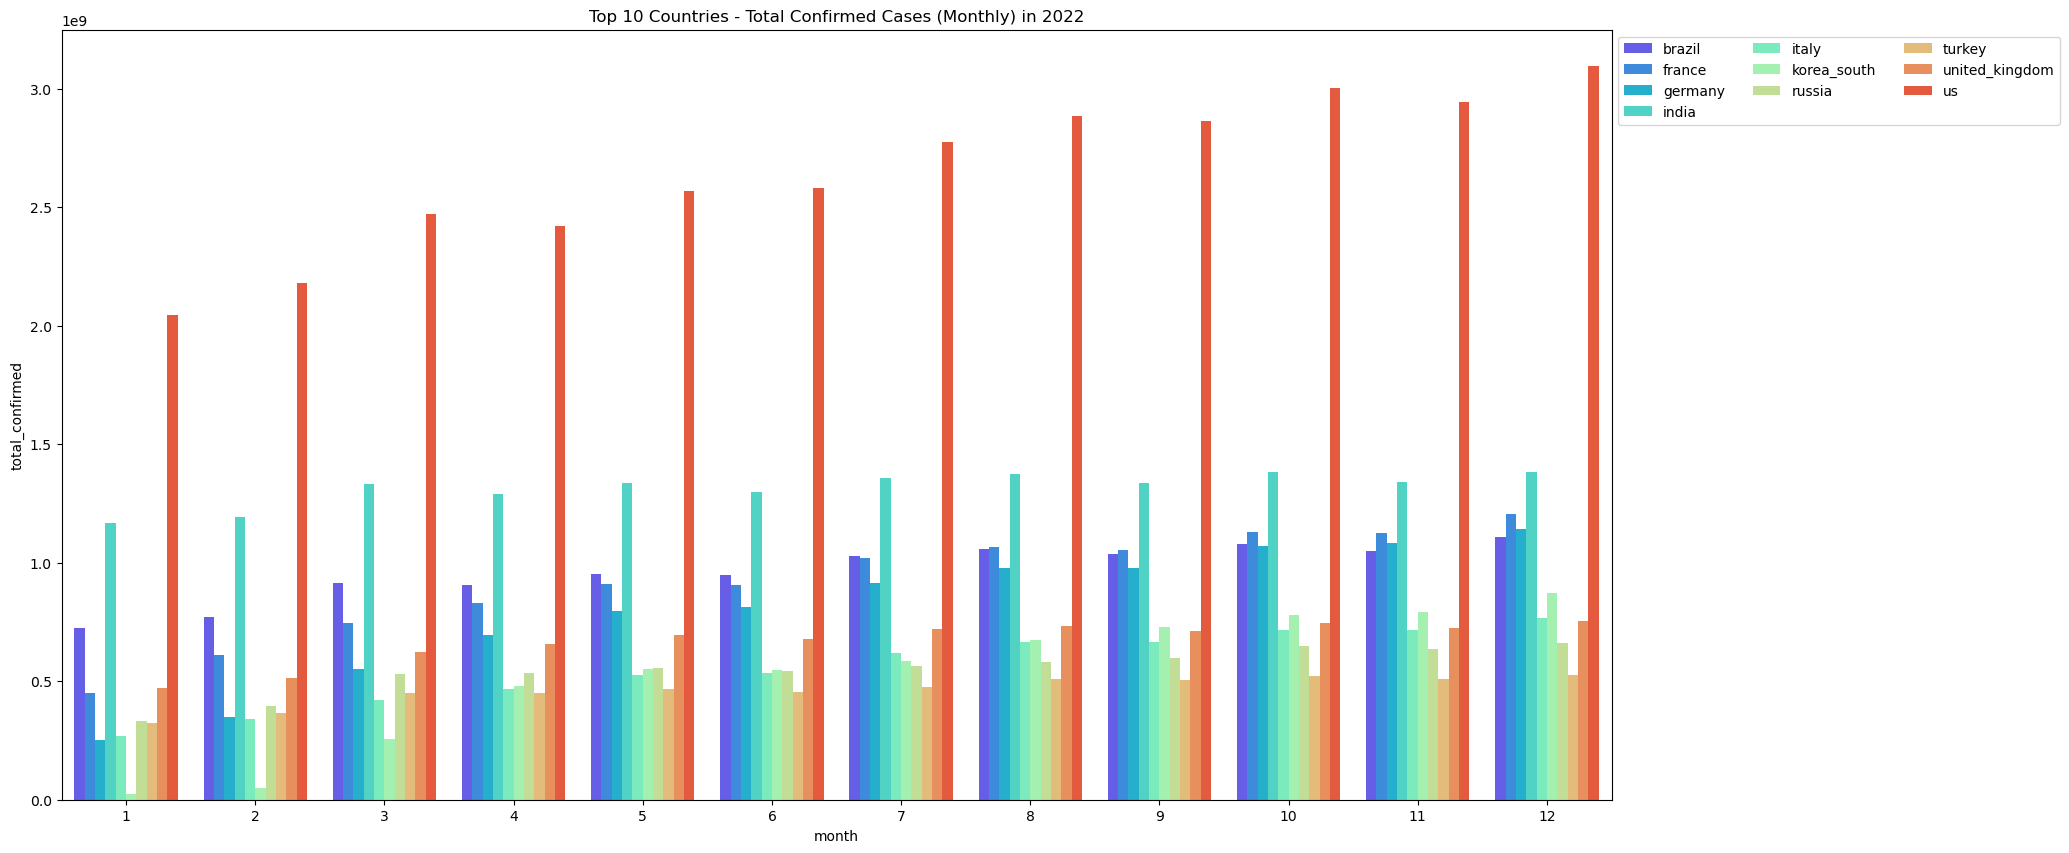

In [10]:
# Plot the bar chart for the top 10 countries
plt.figure(figsize=(20, 10))
sns.barplot(data=top_10_confirmed_2022_monthly, x='month', y='total_confirmed', hue='country', palette='rainbow')
plt.legend(ncol=3, bbox_to_anchor=(1, 1))
plt.title('Top 10 Countries - Total Confirmed Cases (Monthly) in 2022')
plt.show()

In [ ]:
# Stop the Spark session
sc.stop()